In [25]:
from cpymad.madx import Madx
import pandas as pd
import numpy as np

In [26]:
madx = Madx(stdout=True)

madx.call('general_tt24p42_unsplit.madx') 


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.11.28 17:08:15      +
  ++++++++++++++++++++++++++++++++++++++++++++
!==============================================================================================

! MADX file for TT24-P42 UNSPLIT optics

!

! R. Ramjiawan, F.M. Velotti

!

!==============================================================================================

option, RBARC=FALSE;

option, echo;



title, "TT24P42 UNSPLIT optics";



/***************************************

* Cleaning .tfs output files

***************************************/



system, "rm *.tfs";

system, "rm ./jmad/*.tfs";

system, "rm ./jmad/*.inp";

system, "rm ./jmad/*.seq";

/***************************************

* Load needed repos

***************************************/



system,"[ ! -e ea_repo ] && git clone https

rm: ./jmad/*.tfs: No such file or directory
Cloning into 'ea_repo'...




system, "ln -fns ./../../tt24t4_sftpro/line tt24_line";

system, "ln -fns ./../../tt24t4 tt24_model";

system, "ln -fns ./../../sps_ext_elements sps_extr_repo";

call, file="sps_extr_repo/fast_extraction_macros.cmdx";

!=================================

! Macros to define extraction

! bumps and kicker settings

!================================



install_extraction_points(): macro = {



    SEQEDIT,SEQUENCE=SPS;

    INSTALL, ELEMENT=EXTRPT_4,CLASS=marker, AT=0.0045 + (3.791 / 2), FROM = QDA.41910;

    INSTALL, ELEMENT=EXTRPT_4_start,CLASS=marker, AT=0.0045 + (3.791 / 2) + 1e-10, FROM = QDA.41910;

    INSTALL, ELEMENT=EXTRPT_6,CLASS=marker, AT=0.0045 + (3.791 / 2), FROM = QDA.61910;

    INSTALL, ELEMENT=EXTRPT_6_start,CLASS=marker, AT=0.0045 + (3.791 / 2) + 1e-10, FROM = QDA.61910;

    flatten;

    ENDEDIT;



    use, sequence = sps;



};



bumps_on_q26(__lss4_amplitude__,

             __lss6_amplitude__) : macro = {



    t = __lss6_amplitude__ ;



    kMPSH62199 =  4

In [27]:
madx.use(sequence='tt24p42')
madx.select(flag='twiss', column=['s', 'l', 'betx', 'bety', 'betx', 'bety','dx', 'dy', 'mux','muy', 'N1', 'apertype', 'aper_1', 'aper_2'])
twiss = madx.twiss(beta0='initbeta0').dframe()

enter Twiss module
 Found 6 initial orbit vector values from twiss command. 
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

                length                 orbit5                   alfa                gammatr 
      1.0096109400e+03      -0.0000000000e+00       0.0000000000e+00       0.0000000000e+00 

                    q1                    dq1                betxmax                  dxmax 
      3.0435934100e+00       0.0000000000e+00       9.0519482171e+02       1.1308900348e+01 

                 dxrms                 xcomax                 xcorms                     q2 
      2.5563829578e+00       0.0000000000e+00       0.0000000000e+00       2.7706934469e+00 

                   dq2                betymax                  dymax          

In [28]:
from pybt import read_twiss_file

pars, tw = read_twiss_file('twiss_tt24p42_unsplit_nom.tfs')
tw['name'] = tw.index
tw

keyword           s      l  aper_1  aper_2   apertype  \
name                                                                         
tt24p42$start         marker     0.00000  0.000   0.000  0.0000     circle   
tt24t4$start          marker     0.00000  0.000   0.000  0.0000     circle   
begsplit2             marker     0.00000  0.000   0.000  0.0000     circle   
drift_0                drift     0.56100  0.561   0.000  0.0000       none   
mssb.220441            rbend     5.26100  4.700   0.013  0.0825  rectangle   
...                      ...         ...    ...     ...     ...        ...   
drift_138              drift  1009.41094  0.260   0.000  0.0000       none   
tbacb.x1010000    instrument  1009.61094  0.200   0.000  0.0000     circle   
endp42                marker  1009.61094  0.000   0.000  0.0000     circle   
p42_selected$end      marker  1009.61094  0.000   0.000  0.0000     circle   
tt24p42$end           marker  1009.61094  0.000   0.000  0.0000     circle   

                  tilt  kick  hkick  vkick  ...   py        dx       dpx  \
name                                        ...                            
tt24p42$start      0.0   0.0    0.0    0.0  ...  0.0 -0.262686 -0.005513   
tt24t4$start       0.0   0.0    0.0    0.0  ...  0.0 -0.262686 -0.005513   
begsplit2          0.0   0.0    0.0    0.0  ...  0.0 -0.262686 -0.005513   
drift_0            0.0   0.0    0.0    0.0  ...  0.0 -0.265778 -0.005513   
mssb.220441        0.0   0.0    0.0    0.0  ...  0.0 -0.285264 -0.002779   
...                ...   ...    ...    ...  ...  ...       ...       ...   
drift_138          0.0   0.0    0.0    0.0  ...  0.0 -0.143455 -0.035971   
tbacb.x1010000     0.0   0.0    0.0    0.0  ...  0.0 -0.150649 -0.035971   
endp42             0.0   0.0    0.0    0.0  ...  0.0 -0.150649 -0.035971   
p42_selected$end   0.0   0.0    0.0    0.0  ...  0.0 -0.150649 -0.035971   
tt24p42$end        0.0   0.0    0.0    0.0  ...  0.0 -0.150649 -0.035971   

                        dy       dpy      alfx      alfy       mux       muy  \
name                                                                           
tt24p42$start     0.783572  0.004204  0.245672 -1.335209  0.000000  0.000000   
tt24t4$start      0.783572  0.004204  0.245672 -1.335209  0.000000  0.000000   
begsplit2         0.783572  0.004204  0.245672 -1.335209  0.000000  0.000000   
drift_0           0.785930  0.004204  0.225243 -1.341370  0.003080  0.000351   
mssb.220441       0.805687  0.004203  0.054098 -1.392564  0.029739  0.003215   
...                    ...       ...       ...       ...       ...       ...   
drift_138         0.002673  0.034777 -0.246807  0.346424  3.003390  2.761512   
tbacb.x1010000    0.009628  0.034777 -0.539281  0.283012  3.043593  2.770693   
endp42            0.009628  0.034777 -0.539281  0.283012  3.043593  2.770693   
p42_selected$end  0.009628  0.034777 -0.539281  0.283012  3.043593  2.770693   
tt24p42$end       0.009628  0.034777 -0.539281  0.283012  3.043593  2.770693   

                              name  
name                                
tt24p42$start        tt24p42$start  
tt24t4$start          tt24t4$start  
begsplit2                begsplit2  
drift_0                    drift_0  
mssb.220441            mssb.220441  
...                            ...  
drift_138                drift_138  
tbacb.x1010000      tbacb.x1010000  
endp42                      endp42  
p42_selected$end  p42_selected$end  
tt24p42$end            tt24p42$end  

[308 rows x 34 columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
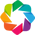

In [29]:
# To install:
# pip install git+https://github.com/gornalexander/madtools
import madplotter as mp
import holoviews as hv

hv.extension('bokeh')

In [30]:
layout =\
mp.plot_synoptic(tw, show_markers=True, show_names=True) +\
mp.plot_lattice(tw, show_markers=True, ylim=(-0.1, 0.1)) 

layout.cols(1)


  Number of warnings: 0

  ++++++++++++++++++++++++++++++++++++++++++++
  +          MAD-X finished normally         +
  ++++++++++++++++++++++++++++++++++++++++++++


:Layout
   .Overlay.I   :Overlay
      .HLine.I       :HLine   [x,y]
      .Rectangles.I  :Rectangles   [s,bottom,right,top]   (color,keyword,name,s,apertype,aper_1,aper_2,l,tilt,angle,k1l)
      .Rectangles.II :Rectangles   [x0,y0,x1,y1]   (color,keyword,name,s,apertype,aper_1,aper_2,l,tilt,angle,k1l)
      .Text.I        :Text   [x,y]
      .Text.II       :Text   [x,y]
      .Text.III      :Text   [x,y]
      .Text.IV       :Text   [x,y]
      .Text.V        :Text   [x,y]
      .Text.VI       :Text   [x,y]
      .Text.VII      :Text   [x,y]
      .Text.VIII     :Text   [x,y]
      .Text.IX       :Text   [x,y]
      .Text.X        :Text   [x,y]
      .Text.XI       :Text   [x,y]
      .Text.XII      :Text   [x,y]
      .Text.XIII     :Text   [x,y]
      .Text.XIV      :Text   [x,y]
      .Text.XV       :Text   [x,y]
      .Text.XVI      :Text   [x,y]
      .Text.XVII     :Text   [x,y]
      .Text.XVIII    :Text   [x,y]
      .Text.XIX      :Text   [x,y]
      .Text.XX       :Text   [x,y]
      .Text.XXI      :Text   [x,y]
      .Text.XXII     :Text   [x,y]
      .Text.XXIII    :Text   [x,y]
      .Text.XXIV     :Text   [x,y]
      .Text.XXV      :Text   [x,y]
      .Text.XXVI     :Text   [x,y]
      .Text.XXVII    :Text   [x,y]
      .Text.XXVIII   :Text   [x,y]
      .Text.XXIX     :Text   [x,y]
      .Text.XXX      :Text   [x,y]
      .Text.XXXI     :Text   [x,y]
      .Text.XXXII    :Text   [x,y]
      .Text.XXXIII   :Text   [x,y]
      .Text.XXXIV    :Text   [x,y]
      .Text.XXXV     :Text   [x,y]
      .Text.XXXVI    :Text   [x,y]
      .Text.XXXVII   :Text   [x,y]
      .Text.XXXVIII  :Text   [x,y]
      .Text.XXXIX    :Text   [x,y]
      .Text.XL       :Text   [x,y]
      .Text.XLI      :Text   [x,y]
      .Text.XLII     :Text   [x,y]
      .Text.XLIII    :Text   [x,y]
      .Text.XLIV     :Text   [x,y]
      .Text.XLV      :Text   [x,y]
      .Text.XLVI     :Text   [x,y]
      .Text.XLVII    :Text   [x,y]
      .Text.XLVIII   :Text   [x,y]
      .Text.XLIX     :Text   [x,y]
      .Text.L        :Text   [x,y]
      .Text.LI       :Text   [x,y]
      .Text.LII      :Text   [x,y]
      .Text.LIII     :Text   [x,y]
      .Text.LIV      :Text   [x,y]
      .Text.LV       :Text   [x,y]
      .Text.LVI      :Text   [x,y]
      .Text.LVII     :Text   [x,y]
      .Text.LVIII    :Text   [x,y]
      .Text.LIX      :Text   [x,y]
      .Text.LX       :Text   [x,y]
      .Text.LXI      :Text   [x,y]
      .Text.LXII     :Text   [x,y]
      .Text.LXIII    :Text   [x,y]
      .Text.LXIV     :Text   [x,y]
      .Text.LXV      :Text   [x,y]
      .Text.LXVI     :Text   [x,y]
      .Text.LXVII    :Text   [x,y]
      .Text.LXVIII   :Text   [x,y]
      .Text.LXIX     :Text   [x,y]
      .Text.LXX      :Text   [x,y]
      .Text.LXXI     :Text   [x,y]
      .Text.LXXII    :Text   [x,y]
      .Text.LXXIII   :Text   [x,y]
      .Text.LXXIV    :Text   [x,y]
      .Text.LXXV     :Text   [x,y]
      .Text.LXXVI    :Text   [x,y]
      .Text.LXXVII   :Text   [x,y]
      .Text.LXXVIII  :Text   [x,y]
      .Text.LXXIX    :Text   [x,y]
      .Text.LXXX     :Text   [x,y]
      .Text.LXXXI    :Text   [x,y]
      .Text.LXXXII   :Text   [x,y]
      .Text.LXXXIII  :Text   [x,y]
      .Text.LXXXIV   :Text   [x,y]
      .Text.LXXXV    :Text   [x,y]
      .Text.LXXXVI   :Text   [x,y]
      .Text.LXXXVII  :Text   [x,y]
      .Text.LXXXVIII :Text   [x,y]
      .Text.LXXXIX   :Text   [x,y]
      .Text.XC       :Text   [x,y]
      .Text.XCI      :Text   [x,y]
      .Text.XCII     :Text   [x,y]
      .Text.XCIII    :Text   [x,y]
      .Text.XCIV     :Text   [x,y]
      .Text.XCV      :Text   [x,y]
      .Text.XCVI     :Text   [x,y]
      .Text.XCVII    :Text   [x,y]
      .Text.XCVIII   :Text   [x,y]
      .Text.XCIX     :Text   [x,y]
      .Text.C        :Text   [x,y]
      .Text.CI       :Text   [x,y]
      .Text.CII      :Text   [x,y]
      .Text.CIII     :Text   [x,y]
      .Text.CIV      :Text   [x,y]
      .Text.CV       :Text   [x,y]
      .Text.CVI      